# Outlier Method of Filtering

**Mostafa Kamal Mostafa Kamel (mos.kamal@nu.edu.eg)**


## Eval


In [1]:
from seasalt.seasalt import *
from glob import glob
from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import NDArray
from PIL import Image, ImageEnhance, ImageOps
from rich.progress import track
from scipy.signal import medfilt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")
path_to_images = Path().resolve().joinpath("BSDS300-test")
image_paths = glob(f"{str(path_to_images)}/*.jpg")


def plot_transformation_hist_eq(im, sp_ratio, size=3):
    im_gs = im.convert("L")
    arr = np.array(im_gs)  # convert the PIL image object to array
    seasoned_image = apply_salt_pepper(arr, ratio=sp_ratio)
    median_filter_corrected_image = medfilt(np.copy(seasoned_image), size)
    corrected_image = fixed_window_outlier_filter(np.copy(seasoned_image), size)
    corrected_image_plus_anisotropic = anisotropic_diffusion(corrected_image, kappa=10)
    corrected_image_edges_method = pipe(np.copy(seasoned_image), size)
    corrected_image_edges_method_plus_anisotropic = anisotropic_diffusion(
        pipe(np.copy(seasoned_image), size), kappa=16
    )
    corrected_adaptive_window = adaptive_kernel_size(
        np.copy(seasoned_image), correction_function=np.median
    )
    corrected_adaptive_window_reisz = adaptive_kernel_size(
        np.copy(seasoned_image),
        5,
        correction_function=modified_riesz_mean,
    )
    corrected_adaptive_window_reisz_edge = pipe(
        np.copy(seasoned_image), size=size, func=adaptive_kernel_size
    )
    noise_baseline_snr = signal_to_noise_ratio(im_gs, np.copy(seasoned_image))
    dtof_snr = signal_to_noise_ratio(im_gs, corrected_image)
    med_snr = signal_to_noise_ratio(im_gs, median_filter_corrected_image)
    anisdtof_snr = signal_to_noise_ratio(im_gs, corrected_image_plus_anisotropic)
    irdtof_snr = signal_to_noise_ratio(im_gs, corrected_image_edges_method)
    anisirdtof_snr = signal_to_noise_ratio(
        im_gs, corrected_image_edges_method_plus_anisotropic
    )
    awsdtof_snr = signal_to_noise_ratio(im_gs, corrected_adaptive_window)
    awsdtofmr_snr = signal_to_noise_ratio(im_gs, corrected_adaptive_window_reisz)
    irawsdtofmr_snr = signal_to_noise_ratio(im_gs, corrected_adaptive_window_reisz_edge)
    return (
        noise_baseline_snr,
        med_snr,
        dtof_snr,
        anisdtof_snr,
        irdtof_snr,
        anisirdtof_snr,
        awsdtof_snr,
        awsdtofmr_snr,
        irawsdtofmr_snr,
    )

In [2]:
def plot_single_image(seasoned_arr):
    fig = plt.figure(
        figsize=(
            10,
            20,
        ),
        dpi=80,
    )
    gs = fig.add_gridspec(1, 1, hspace=0.12, wspace=0.08)
    ax = gs.subplots(sharex="col", sharey="row")
    ax.imshow(seasoned_arr, cmap="gray", vmin=0, vmax=255)
    ax.set_axis_off()

In [3]:
data_dict_eq = dict(
    im_index=[],
    sp=[],
    noise_baseline_snr=[],
    med_snr=[],
    dtof_snr=[],
    anisdtof_snr=[],
    irdtof_snr=[],
    anisirdtof_snr=[],
    awsdtof_snr=[],
    awsdtofmr_snr=[],
    irawsdtofmr_snr=[],
)
root_path = Path().resolve().joinpath("aof_eval").joinpath("eq")
for ix, p in track(enumerate(image_paths)):
    print(ix, len(image_paths))
    img_name = p.split("/")[-1].split(".")[0]
    for sp in [0.2, 0.4, 0.6, 0.8, 0.95]:
        print(ix, len(image_paths), sp)
        im = Image.open(p)
        (
            noise_baseline_snr,
            med_snr,
            dtof_snr,
            anisdtof_snr,
            irdtof_snr,
            anisirdtof_snr,
            awsdtof_snr,
            awsdtofmr_snr,
            irawsdtofmr_snr,
        ) = plot_transformation_hist_eq(
            im,
            sp_ratio=sp,
            size=9,
        )
        data_dict_eq["im_index"].append(img_name)
        data_dict_eq["sp"].append(sp)
        data_dict_eq["noise_baseline_snr"].append(noise_baseline_snr)
        data_dict_eq["med_snr"].append(med_snr)
        data_dict_eq["dtof_snr"].append(dtof_snr)
        data_dict_eq["anisdtof_snr"].append(anisdtof_snr)
        data_dict_eq["irdtof_snr"].append(irdtof_snr)
        data_dict_eq["anisirdtof_snr"].append(anisirdtof_snr)
        data_dict_eq["awsdtof_snr"].append(awsdtof_snr)
        data_dict_eq["awsdtofmr_snr"].append(awsdtofmr_snr)
        data_dict_eq["irawsdtofmr_snr"].append(irawsdtofmr_snr)

Output()

0 100

0 100 0.2

0 100 0.4

0 100 0.6

0 100 0.8

0 100 0.95

1 100

1 100 0.2

1 100 0.4

1 100 0.6

1 100 0.8

1 100 0.95

2 100

2 100 0.2

2 100 0.4

2 100 0.6

2 100 0.8

2 100 0.95

3 100

3 100 0.2

3 100 0.4

3 100 0.6

3 100 0.8

3 100 0.95

4 100

4 100 0.2

4 100 0.4

4 100 0.6

4 100 0.8

4 100 0.95

5 100

5 100 0.2

5 100 0.4

5 100 0.6

5 100 0.8

5 100 0.95

6 100

6 100 0.2

6 100 0.4

6 100 0.6

6 100 0.8

6 100 0.95

7 100

7 100 0.2

7 100 0.4

7 100 0.6

7 100 0.8

7 100 0.95

8 100

8 100 0.2

8 100 0.4

8 100 0.6

8 100 0.8

8 100 0.95

9 100

9 100 0.2

9 100 0.4

9 100 0.6

9 100 0.8

9 100 0.95

10 100

10 100 0.2

10 100 0.4

10 100 0.6

10 100 0.8

10 100 0.95

11 100

11 100 0.2

11 100 0.4

11 100 0.6

11 100 0.8

11 100 0.95

12 100

12 100 0.2

12 100 0.4

12 100 0.6

12 100 0.8

12 100 0.95

13 100

13 100 0.2

13 100 0.4

13 100 0.6

13 100 0.8

13 100 0.95

14 100

14 100 0.2

14 100 0.4

14 100 0.6

14 100 0.8

14 100 0.95

15 100

15 100 0.2

15 100 0.4

15 100 0.6

15 100 0.8

15 100 0.95

16 100

16 100 0.2

16 100 0.4

16 100 0.6

16 100 0.8

16 100 0.95

17 100

17 100 0.2

17 100 0.4

17 100 0.6

17 100 0.8

17 100 0.95

18 100

18 100 0.2

18 100 0.4

18 100 0.6

18 100 0.8

18 100 0.95

19 100

19 100 0.2

19 100 0.4

19 100 0.6

19 100 0.8

19 100 0.95

20 100

20 100 0.2

20 100 0.4

20 100 0.6

20 100 0.8

20 100 0.95

21 100

21 100 0.2

21 100 0.4

21 100 0.6

21 100 0.8

21 100 0.95

22 100

22 100 0.2

22 100 0.4

22 100 0.6

22 100 0.8

22 100 0.95

23 100

23 100 0.2

23 100 0.4

23 100 0.6

23 100 0.8

23 100 0.95

24 100

24 100 0.2

24 100 0.4

24 100 0.6

24 100 0.8

24 100 0.95

25 100

25 100 0.2

25 100 0.4

25 100 0.6

25 100 0.8

25 100 0.95

26 100

26 100 0.2

26 100 0.4

26 100 0.6

26 100 0.8

26 100 0.95

27 100

27 100 0.2

27 100 0.4

27 100 0.6

27 100 0.8

27 100 0.95

28 100

28 100 0.2

28 100 0.4

28 100 0.6

28 100 0.8

28 100 0.95

29 100

29 100 0.2

29 100 0.4

29 100 0.6

29 100 0.8

29 100 0.95

30 100

30 100 0.2

30 100 0.4

30 100 0.6

30 100 0.8

30 100 0.95

31 100

31 100 0.2

31 100 0.4

31 100 0.6

31 100 0.8

31 100 0.95

32 100

32 100 0.2

32 100 0.4

32 100 0.6

32 100 0.8

32 100 0.95

33 100

33 100 0.2

33 100 0.4

33 100 0.6

33 100 0.8

33 100 0.95

34 100

34 100 0.2

34 100 0.4

34 100 0.6

34 100 0.8

34 100 0.95

35 100

35 100 0.2

35 100 0.4

35 100 0.6

35 100 0.8

35 100 0.95

36 100

36 100 0.2

36 100 0.4

36 100 0.6

36 100 0.8

36 100 0.95

37 100

37 100 0.2

37 100 0.4

37 100 0.6

37 100 0.8

37 100 0.95

38 100

38 100 0.2

38 100 0.4

38 100 0.6

38 100 0.8

38 100 0.95

39 100

39 100 0.2

39 100 0.4

39 100 0.6

39 100 0.8

39 100 0.95

40 100

40 100 0.2

40 100 0.4

40 100 0.6

40 100 0.8

40 100 0.95

41 100

41 100 0.2

41 100 0.4

41 100 0.6

41 100 0.8

41 100 0.95

42 100

42 100 0.2

42 100 0.4

42 100 0.6

42 100 0.8

42 100 0.95

43 100

43 100 0.2

43 100 0.4

43 100 0.6

43 100 0.8

43 100 0.95

44 100

44 100 0.2

44 100 0.4

44 100 0.6

44 100 0.8

44 100 0.95

45 100

45 100 0.2

45 100 0.4

45 100 0.6

45 100 0.8

45 100 0.95

46 100

46 100 0.2

46 100 0.4

46 100 0.6

46 100 0.8

46 100 0.95

47 100

47 100 0.2

47 100 0.4

47 100 0.6

47 100 0.8

47 100 0.95

48 100

48 100 0.2

48 100 0.4

48 100 0.6

48 100 0.8

48 100 0.95

49 100

49 100 0.2

49 100 0.4

49 100 0.6

49 100 0.8

49 100 0.95

50 100

50 100 0.2

50 100 0.4

50 100 0.6

50 100 0.8

50 100 0.95

51 100

51 100 0.2

51 100 0.4

51 100 0.6

51 100 0.8

51 100 0.95

52 100

52 100 0.2

52 100 0.4

52 100 0.6

52 100 0.8

52 100 0.95

53 100

53 100 0.2

53 100 0.4

53 100 0.6

53 100 0.8

53 100 0.95

54 100

54 100 0.2

54 100 0.4

54 100 0.6

54 100 0.8

54 100 0.95

55 100

55 100 0.2

55 100 0.4

55 100 0.6

55 100 0.8

55 100 0.95

56 100

56 100 0.2

56 100 0.4

56 100 0.6

56 100 0.8

56 100 0.95

57 100

57 100 0.2

57 100 0.4

57 100 0.6

57 100 0.8

57 100 0.95

58 100

58 100 0.2

58 100 0.4

58 100 0.6

58 100 0.8

58 100 0.95

59 100

59 100 0.2

59 100 0.4

59 100 0.6

59 100 0.8

59 100 0.95

60 100

60 100 0.2

60 100 0.4

60 100 0.6

60 100 0.8

60 100 0.95

61 100

61 100 0.2

61 100 0.4

61 100 0.6

61 100 0.8

61 100 0.95

62 100

62 100 0.2

62 100 0.4

62 100 0.6

62 100 0.8

62 100 0.95

63 100

63 100 0.2

63 100 0.4

63 100 0.6

63 100 0.8

63 100 0.95

64 100

64 100 0.2

64 100 0.4

64 100 0.6

64 100 0.8

64 100 0.95

65 100

65 100 0.2

65 100 0.4

65 100 0.6

65 100 0.8

65 100 0.95

66 100

66 100 0.2

66 100 0.4

66 100 0.6

66 100 0.8

66 100 0.95

67 100

67 100 0.2

67 100 0.4

67 100 0.6

67 100 0.8

67 100 0.95

68 100

68 100 0.2

68 100 0.4

68 100 0.6

68 100 0.8

68 100 0.95

69 100

69 100 0.2

69 100 0.4

69 100 0.6

69 100 0.8

69 100 0.95

70 100

70 100 0.2

70 100 0.4

70 100 0.6

70 100 0.8

70 100 0.95

71 100

71 100 0.2

71 100 0.4

71 100 0.6

71 100 0.8

71 100 0.95

72 100

72 100 0.2

72 100 0.4

72 100 0.6

72 100 0.8

72 100 0.95

73 100

73 100 0.2

73 100 0.4

73 100 0.6

73 100 0.8

73 100 0.95

74 100

74 100 0.2

74 100 0.4

74 100 0.6

74 100 0.8

74 100 0.95

75 100

75 100 0.2

75 100 0.4

75 100 0.6

75 100 0.8

75 100 0.95

76 100

76 100 0.2

76 100 0.4

76 100 0.6

76 100 0.8

76 100 0.95

77 100

77 100 0.2

77 100 0.4

77 100 0.6

77 100 0.8

77 100 0.95

78 100

78 100 0.2

78 100 0.4

78 100 0.6

78 100 0.8

78 100 0.95

79 100

79 100 0.2

79 100 0.4

79 100 0.6

79 100 0.8

79 100 0.95

80 100

80 100 0.2

80 100 0.4

80 100 0.6

80 100 0.8

80 100 0.95

81 100

81 100 0.2

81 100 0.4

81 100 0.6

81 100 0.8

81 100 0.95

82 100

82 100 0.2

82 100 0.4

82 100 0.6

82 100 0.8

82 100 0.95

83 100

83 100 0.2

83 100 0.4

83 100 0.6

83 100 0.8

83 100 0.95

84 100

84 100 0.2

84 100 0.4

84 100 0.6

84 100 0.8

84 100 0.95

85 100

85 100 0.2

85 100 0.4

85 100 0.6

85 100 0.8

85 100 0.95

86 100

86 100 0.2

86 100 0.4

86 100 0.6

86 100 0.8

86 100 0.95

87 100

87 100 0.2

87 100 0.4

87 100 0.6

87 100 0.8

87 100 0.95

88 100

88 100 0.2

88 100 0.4

88 100 0.6

88 100 0.8

88 100 0.95

89 100

89 100 0.2

89 100 0.4

89 100 0.6

89 100 0.8

89 100 0.95

90 100

90 100 0.2

90 100 0.4

90 100 0.6

90 100 0.8

90 100 0.95

91 100

91 100 0.2

91 100 0.4

91 100 0.6

91 100 0.8

91 100 0.95

92 100

92 100 0.2

92 100 0.4

92 100 0.6

92 100 0.8

92 100 0.95

93 100

93 100 0.2

93 100 0.4

93 100 0.6

93 100 0.8

93 100 0.95

94 100

94 100 0.2

94 100 0.4

94 100 0.6

94 100 0.8

94 100 0.95

95 100

95 100 0.2

95 100 0.4

95 100 0.6

95 100 0.8

95 100 0.95

96 100

96 100 0.2

96 100 0.4

96 100 0.6

96 100 0.8

96 100 0.95

97 100

97 100 0.2

97 100 0.4

97 100 0.6

97 100 0.8

97 100 0.95

98 100

98 100 0.2

98 100 0.4

98 100 0.6

98 100 0.8

98 100 0.95

99 100

99 100 0.2

99 100 0.4

99 100 0.6

99 100 0.8

99 100 0.95

In [10]:
sns.set_theme()


In [11]:
df_eq = pd.DataFrame(data_dict_eq)
df_eq.to_pickle("df_eq.pkl")

In [13]:
df_aof_agg = df_eq.groupby("sp").agg(
    {
        "noise_baseline_snr": [np.mean],
        "med_snr": [np.mean],
        "dtof_snr": [np.mean],
        "anisdtof_snr": [np.mean],
        "irdtof_snr": [np.mean],
        "anisirdtof_snr": [np.mean],
        "awsdtof_snr": [np.mean],
        "awsdtofmr_snr": [np.mean],
        "irawsdtofmr_snr": [np.mean],
    }
)


In [14]:
df_aof_agg = df_aof_agg.reset_index()
df_aof_agg.columns = [
    "sp",
    "mean_noise_baseline_snr",
    "mean_med_snr",
    "mean_dtof_snr",
    "mean_anisdtof_snr",
    "mean_irdtof_snr",
    "mean_anisirdtof_snr",
    "mean_awsdtof_snr",
    "mean_awsdtofmr_snr",
    "mean_irawsdtofmr_snr",
]

In [16]:
df_aof_agg

,sp,mean_noise_baseline_snr,mean_med_snr,mean_dtof_snr,mean_anisdtof_snr,mean_irdtof_snr,mean_anisirdtof_snr,mean_awsdtof_snr,mean_awsdtofmr_snr,mean_irawsdtofmr_snr
0,0.20,12.076495,22.303068,27.547116,27.702564,27.534820,27.458392,29.200161,28.842010,29.075195
1,0.40,9.065218,21.180179,23.364854,23.843407,23.359637,23.948582,25.877363,26.096869,26.307650
2,0.60,7.306600,19.915802,19.667438,20.047950,19.665512,20.233840,23.421942,24.271216,24.469834
3,0.80,6.057935,14.452336,16.144079,16.353816,16.143985,16.469501,20.917574,22.389482,22.574617
4,0.95,5.311298,6.857490,13.534954,13.637343,13.534954,13.673259,12.033587,19.162119,20.162570


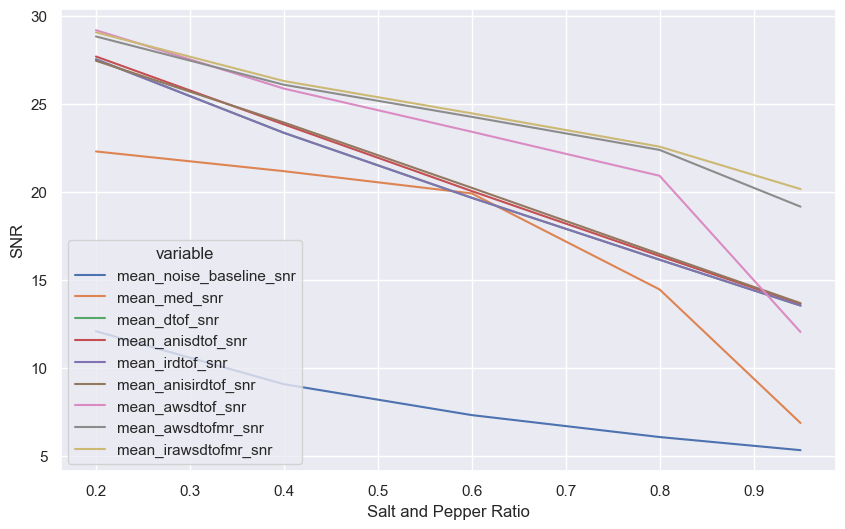

In [18]:
df_melted = df_aof_agg.melt(id_vars="sp", var_name="variable", value_name="value")


plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x="sp", y="value", hue="variable")

plt.xlabel("Salt and Pepper Ratio")
plt.ylabel("SNR")
plt.show()

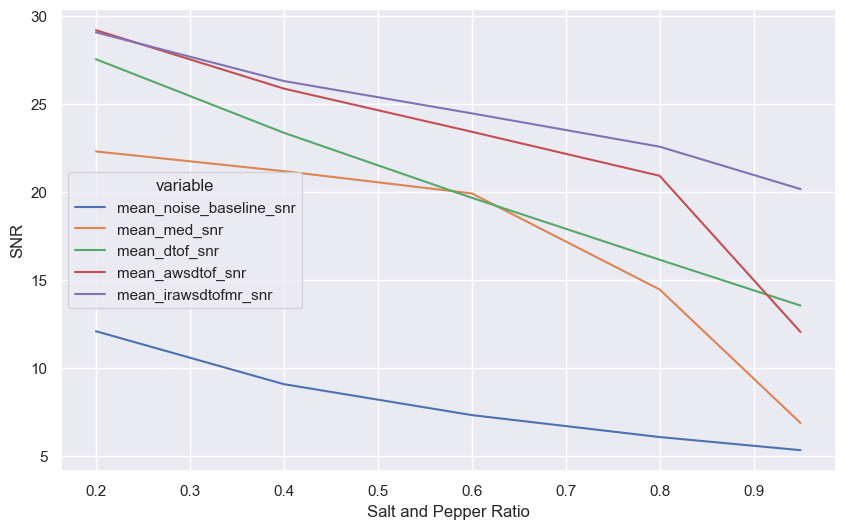

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_melted[
        df_melted.variable.isin(
            [
                "mean_noise_baseline_snr",
                "mean_med_snr",
                "mean_dtof_snr",
                "mean_awsdtof_snr",
                "mean_irawsdtofmr_snr",
            ]
        )
    ],
    x="sp",
    y="value",
    hue="variable",
)

plt.xlabel("Salt and Pepper Ratio")
plt.ylabel("SNR")
plt.show()